In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

consumer_key = "bV1ZWR3eugtfZjTPWpza4AUdD"
consumer_secret = "5ZUXJdzBfESNZYJdELyMfJyln7GSh1Xhe0k8pH7mbLCVdocoIH"
access_token = "710194348990795776-wHhDWFHsRLPIdw3pt46Ol7wTiLdjkwT"
access_token_secret = "1DPPul1CPwvlCiC8dlBaeSFbEW6UqGbOQnXEe1elpLIOD"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


In [14]:
target_tags = ["#ElectricVehicle"]

counter = 1

Sentiments = []

pos_string = "Growth, Innovation, Improve, Safe, Smart"
neu_string = ""
neg_string = "Expensive, Slow, Inefficent, Limtied Range"
happy_emoticon_string = ":-) :) :-D  ;-) :-P"
angry_emoticon_string = ":-( :( D-< :'("



for tag in target_tags:
        
    public_tweets = api.search(tag, rpp=100)
    print(tag)
    
for tweet in public_tweets["statuses"]:

    
    compound = analyzer.polarity_scores(tweet["text"])["compound"]
    pos = analyzer.polarity_scores(tweet[pos_string])["pos"]
    neu = analyzer.polarity_scores(tweet[neu_string])["neu"]
    neg = analyzer.polarity_scores(tweet[neg_string])["neg"]
    tweets_ago = counter
        
    Sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
        
        
    counter = counter + 1

#ElectricVehicle


KeyError: 'Growth, Innovation, Improve, Safe, Smart'

In [11]:
sentiments_pd = pd.DataFrame.from_dict(Sentiments)
sentiments_pd.head(100)

,Compound,Date,Negative,Neutral,Positive,Tweets Ago
0,0.4939,Sat Jan 06 17:24:02 +0000 2018,0.775,0.000,0.225,1
1,0.0000,Sat Jan 06 17:21:12 +0000 2018,1.000,0.000,0.000,2
2,-0.3612,Sat Jan 06 17:10:20 +0000 2018,0.878,0.122,0.000,3
3,-0.3612,Sat Jan 06 17:10:11 +0000 2018,0.878,0.122,0.000,4
4,0.0000,Sat Jan 06 17:09:34 +0000 2018,1.000,0.000,0.000,5
5,-0.3612,Sat Jan 06 17:00:18 +0000 2018,0.878,0.122,0.000,6
6,0.4926,Sat Jan 06 16:57:04 +0000 2018,0.834,0.000,0.166,7
7,-0.3612,Sat Jan 06 16:46:06 +0000 2018,0.878,0.122,0.000,8
8,-0.0516,Sat Jan 06 16:31:31 +0000 2018,0.792,0.109,0.099,9
9,-0.3612,Sat Jan 06 16:25:01 +0000 2018,0.878,0.122,0.000,10


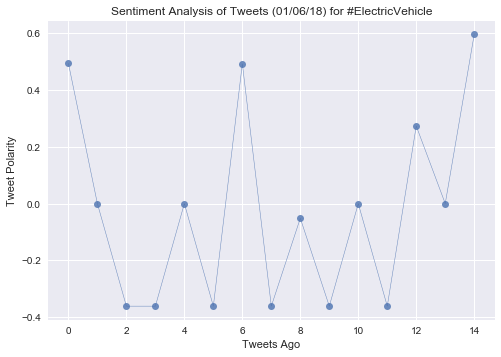

In [10]:
plt.plot(np.arange(len(sentiments_pd["Compound"])),
         sentiments_pd["Compound"], marker="o", linewidth=0.5,
         alpha=0.8)

plt.title("Sentiment Analysis of Tweets (%s) for %s" % (time.strftime("%x"), target_user))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()